<a href="https://colab.research.google.com/github/Hebabeg/mlprojects/blob/main/Mental_Health/Predictive_Analysis_on_a_mental_health_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset used: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset?select=Mental+Health+Dataset.csv


In [28]:
!pip install pandas matplotlib seaborn xgboost gradio

In [29]:
!pip install -U scikit-learn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-6d690d03a8d5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)
<ipython-input-11-6d690d03a8d5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)
<ipython-input-11-6d690d03a8d5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     19191
           1       0.98      0.98      0.98     17968
           2       0.99      0.98      0.98     20274

    accuracy                           0.98     57433
   macro avg       0.98      0.98      0.98     57433
weighted avg       0.98      0.98      0.98     57433



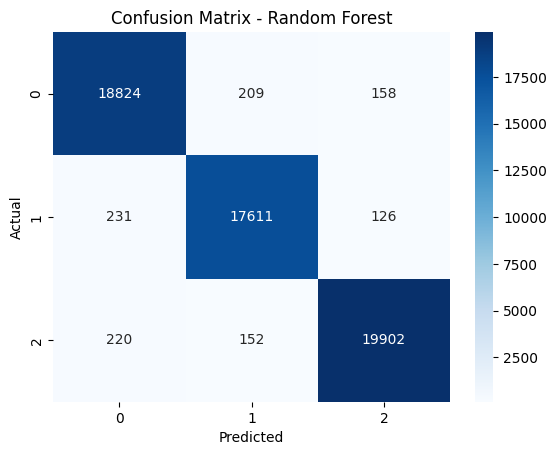

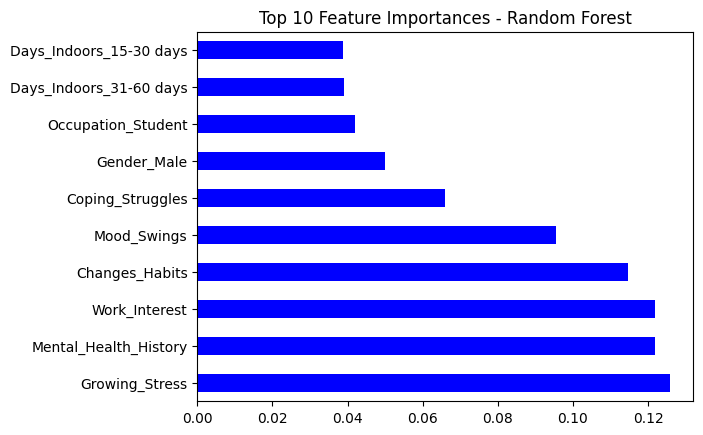

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:55:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     19191
           1       0.98      0.99      0.98     17968
           2       0.99      0.98      0.99     20274

    accuracy                           0.98     57433
   macro avg       0.98      0.98      0.98     57433
weighted avg       0.98      0.98      0.98     57433



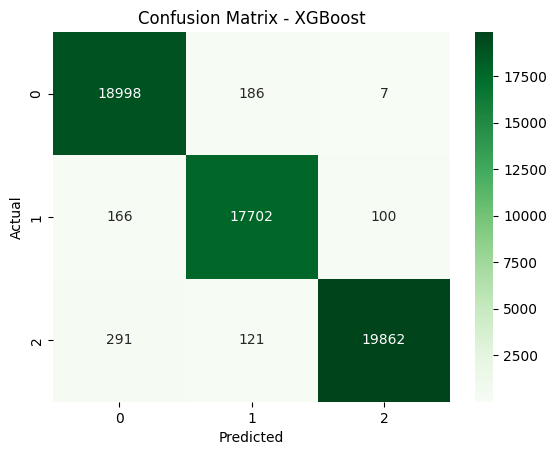

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from google.colab import drive


drive.mount('/content/drive')


file_path = '/content/Mental Health Dataset.csv'
df = pd.read_csv(file_path)


drop_columns = ['Timestamp']
df.drop(columns=drop_columns, inplace=True)
df.fillna('Nan', inplace=True)


df = df[df['self_employed'] != 'Nan']


y_n_m_fields = ['Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
                'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
                'mental_health_interview', 'care_options']

for cols in y_n_m_fields:
    df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)


y_n_fields = ['self_employed', 'family_history', 'treatment']

for cols in y_n_fields:
    df[cols] = df[cols].map({'Yes': 1, 'No': 0}).fillna(0)


non_ordinal_f = ['Gender', 'Occupation', 'Days_Indoors']
df = pd.get_dummies(df, columns=non_ordinal_f, drop_first=True)

mood_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Mood_Swings'] = df['Mood_Swings'].map(mood_map)


country_counts = df['Country'].value_counts()
df['Country'] = df['Country'].map(country_counts)


target = 'Social_Weakness'


X = df.drop(columns=[target])
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='darkblue')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-34-5358c931fe96>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoder.fit_transform(df3[col])
<ipython-input-34-5358c931fe96>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = label_encoder.fit_transform(df3[col])
<ipython-input-34-5358c931fe96>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

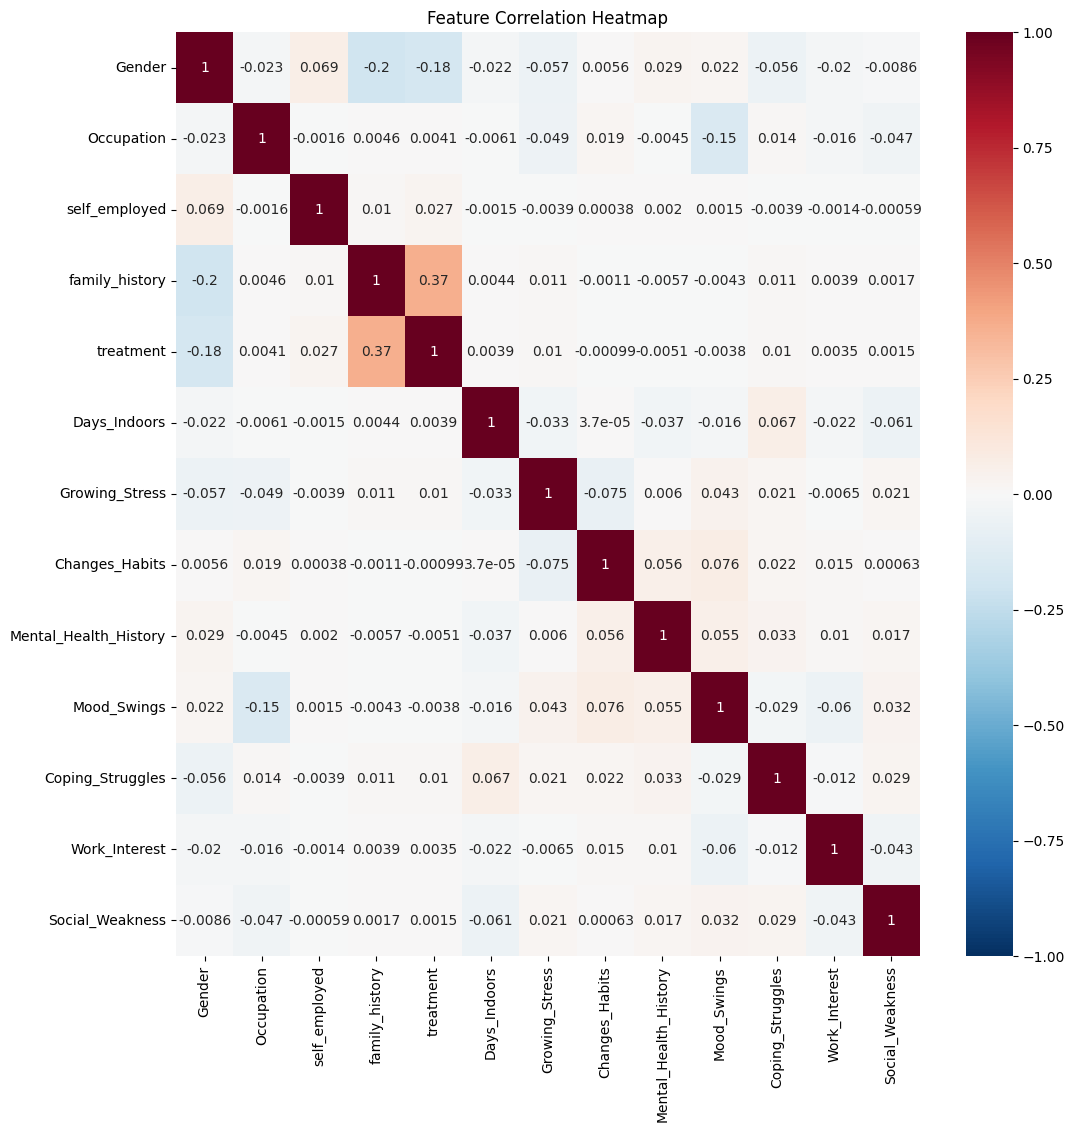

In [34]:
drive.mount('/content/drive')


file_path = '/content/Mental Health Dataset.csv'
df2 = pd.read_csv(file_path)
df2.drop(columns = ['Timestamp'], inplace = True)
df2.fillna('Nan', inplace = True)

df3 = df2[['Gender', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       ]]


country_counts = df['Country'].value_counts()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df3.select_dtypes(include=['object']).columns:
    df3[col] = label_encoder.fit_transform(df3[col])


plt.figure(figsize=(12, 12))
sns.heatmap(df3.corr(), annot=True, center=0, vmin=-1.0, cmap='RdBu_r')
plt.title('Feature Correlation Heatmap')
plt.show()


The overall purpose of the code is to perform predictive analysis using machine learning models on a mental health dataset. It prepares the data, trains predictive models, evaluates model performance using classification metrics, and provides meaningful visualizations. These steps can assist in understanding the key factors influencing mental health treatment decisions and help in predicting whether treatment is necessary based on a person's input features.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-37-6b9ff0413b23>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)
<ipython-input-37-6b9ff0413b23>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)
<ipython-input-37-6b9ff0413b23>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     20914
           1       1.00      1.00      1.00     16785
           2       0.97      0.98      0.98     19734

    accuracy                           0.98     57433
   macro avg       0.98      0.98      0.98     57433
weighted avg       0.98      0.98      0.98     57433



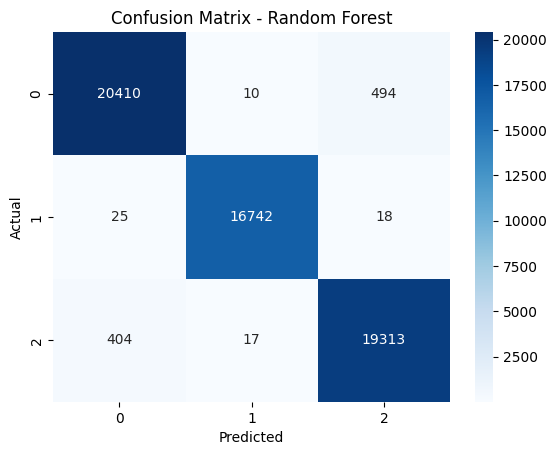

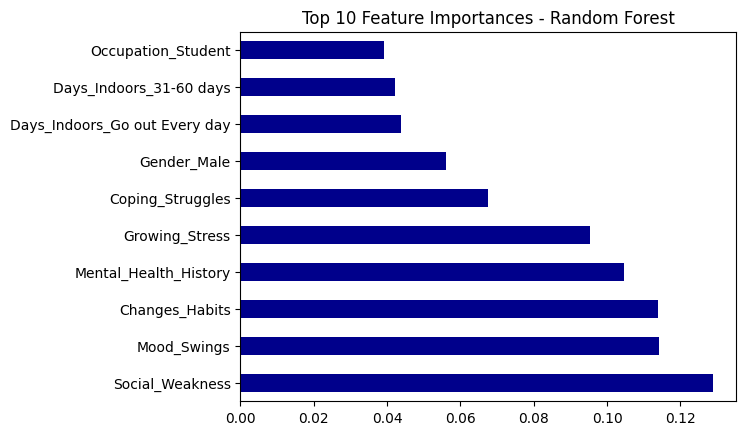

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     20914
           1       1.00      1.00      1.00     16785
           2       0.98      0.98      0.98     19734

    accuracy                           0.99     57433
   macro avg       0.99      0.99      0.99     57433
weighted avg       0.99      0.99      0.99     57433



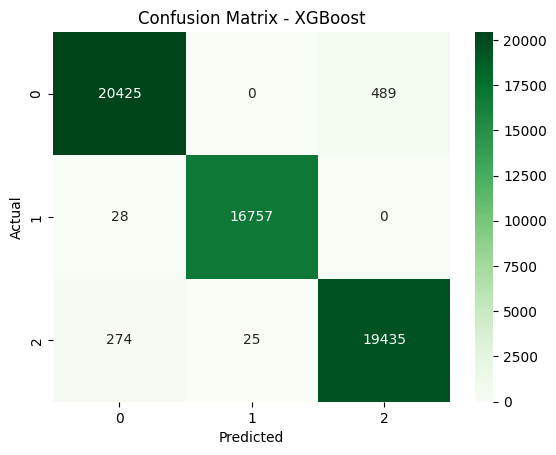

In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from google.colab import drive

drive.mount('/content/drive')


file_path = '/content/Mental Health Dataset.csv'
df = pd.read_csv(file_path)


drop_columns = ['Timestamp']
df.drop(columns=drop_columns, inplace=True)
df.fillna('Nan', inplace=True)
df = df[df['self_employed'] != 'Nan']

y_n_m_fields = ['Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
                'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
                'mental_health_interview', 'care_options']

for cols in y_n_m_fields:
    df[cols] = df[cols].map({'Yes': 1, 'No': 0, 'Maybe': 2}).fillna(0)

y_n_fields = ['self_employed', 'family_history', 'treatment']

for cols in y_n_fields:
    df[cols] = df[cols].map({'Yes': 1, 'No': 0}).fillna(0)

non_ordinal_f = ['Gender', 'Occupation', 'Days_Indoors']
df = pd.get_dummies(df, columns=non_ordinal_f, drop_first=True)

mood_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Mood_Swings'] = df['Mood_Swings'].map(mood_map)

country_counts = df['Country'].value_counts()
df['Country'] = df['Country'].map(country_counts)


target = 'Work_Interest'

X = df.drop(columns=[target])
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='darkblue')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
